<a href="https://colab.research.google.com/github/eisbetterthanpi/vision/blob/main/CLIP_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## from clean

In [ ]:
# @title setup / model
# https://colab.research.google.com/github/openai/clip/blob/master/notebooks/Interacting_with_CLIP.ipynb
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

import numpy as np
import torch
# from pkg_resources import packaging
# print("Torch version:", torch.__version__)
import clip
# clip.available_models()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model, preprocess = clip.load("ViT-B/32") # preprocess: normalize intensity using dataset mean and sd then resize and center-crop to conform to the model expects. 
# model.cuda().eval()
model.to(device).eval()
input_resolution = model.visual.input_resolution # 224
context_length = model.context_length # 77
vocab_size = model.vocab_size # 49408
# print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}") # 151,277,313
# clip.tokenize("Hello World!") # case-insensitive tokenizer, padded to become 77 tokens


In [ ]:
# @title download 10k (old)
# https://drive.google.com/file/d/1NkCNecLpFG3i7bo3Vl9RQSwzBpSRQ29q/view?usp=sharing
!gdown 1NkCNecLpFG3i7bo3Vl9RQSwzBpSRQ29q -O gsv.zip
!unzip /content/gsv.zip -d /content
import shutil
shutil.rmtree('/content/google_street_view/meta_data', ignore_errors=True) # delete the meta_data folder

shutil.rmtree('/content/google_street_view/01/02 Drop (More than 90% Obscured)', ignore_errors=True)
shutil.rmtree('/content/google_street_view/01/03 Drop (Multiple Types of Property)', ignore_errors=True)

# move files # https://www.geeksforgeeks.org/how-to-move-all-files-from-one-directory-to-another-using-python/
source = '/content/google_street_view/01/01 Keep'
destination = '/content/google_street_view/01'
import os
allfiles = os.listdir(source)
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

shutil.rmtree('/content/google_street_view/01/01 Keep', ignore_errors=True)


In [ ]:
# @title download 70k
# https://drive.google.com/file/d/1-7ZC29k4VxXQkpnOuLfj7Ag_SFTM4LV8/view?usp=share_link
# !gdown 1-7ZC29k4VxXQkpnOuLfj7Ag_SFTM4LV8 -O gsv.zip
# !unzip /content/gsv.zip -d /
# !rm -R /content/gsv70k/.ipynb_checkpoints
# !rm -R /content/gsv70k/01/.ipynb_checkpoints
# !rm -R /content/gsv70k/02/.ipynb_checkpoints
# !rm -R /content/gsv70k/03/.ipynb_checkpoints
# !rm -R /content/gsv70k/04/.ipynb_checkpoints
# !rm -R /content/gsv70k/05/.ipynb_checkpoints
# !rm -R /content/gsv70k/06/.ipynb_checkpoints

# 70k_clip
# https://drive.google.com/file/d/1OqKQcwWpb6TFKAgcqeq0UhzWYRBvlyEj/view?usp=sharing
!gdown 1OqKQcwWpb6TFKAgcqeq0UhzWYRBvlyEj -O gsv.zip
!unzip /content/gsv.zip -d /
!rm -R /content/gsv70k_clip/.ipynb_checkpoints
!rm -R /content/gsv70k_clip/01/.ipynb_checkpoints
!rm -R /content/gsv70k_clip/02/.ipynb_checkpoints
!rm -R /content/gsv70k_clip/03/.ipynb_checkpoints
!rm -R /content/gsv70k_clip/04/.ipynb_checkpoints
!rm -R /content/gsv70k_clip/05/.ipynb_checkpoints
!rm -R /content/gsv70k_clip/06/.ipynb_checkpoints


In [ ]:
# @title gmap_frombad
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/ggmap_frombad3.zip -d /
!unzip /content/drive/MyDrive/gmap_frombad3.zip -d /

!rm -R /content/ggmap_frombad/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/01/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/02/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/03/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/04/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/05/.ipynb_checkpoints
!rm -R /content/ggmap_frombad/06/.ipynb_checkpoints

!rm -R /content/gmap_frombad/.ipynb_checkpoints
!rm -R /content/gmap_frombad/01/.ipynb_checkpoints
!rm -R /content/gmap_frombad/02/.ipynb_checkpoints
!rm -R /content/gmap_frombad/03/.ipynb_checkpoints
!rm -R /content/gmap_frombad/04/.ipynb_checkpoints
!rm -R /content/gmap_frombad/05/.ipynb_checkpoints
!rm -R /content/gmap_frombad/06/.ipynb_checkpoints


In [ ]:
# @title data
from torchvision import datasets#, transforms

# dir='/content/google_street_view'
dir='/content/gsv70k'

# # data = datasets.ImageFolder(dir, transform=transform)
data = datasets.ImageFolder(dir, transform=None)
torch.manual_seed(0)


In [ ]:
# @title test texts
images=[]
og_img=[]

c=30
# for i in range(c,c+10):
for i in range(c,c+15):
    img,label=data[i]
    images.append(preprocess(img))
    og_img.append(img)

# 21

# blur 7 43 122
# repeat 88-89
# texts=['a clear image of a house','a blurred image','a plain background']
# an image without a house ; 
# texts=['a clear image of a house','an image of a house ','a blurred image','a plain background']
# texts=['a clear image of a house','an image of a wall','an image of trees','an image of a vehicle','a blurred image','a plain background']
# texts=['an image of a house','a house facade','an image of a construction site','a plain background']
texts=['a house','a construction site','an image of a wall','an image of trees','an image of a vehicle','a blurred image','a plain background','a plain shade of color']

# housing facade, construction site, house front


# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
# text_tokens = clip.tokenize(texts).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
# print(similarity)

count = len(texts)

import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 14))
plt.figure(figsize=(30, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(og_img):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, len(og_img) - 0.5])
# plt.ylim([count + 0.5, -2])
plt.ylim([count - 0.5, -1.5]) # bottom, top margin
plt.show()
# plt.title("Cosine similarity between text and image features", size=20)


In [ ]:
# @title base get similarity

images=[]
og_img=[]

c=110
for i in range(c,c+10):
    img,label=data[i]
    images.append(preprocess(img))
    og_img.append(img)

# blur 7 43
# repeat 88-89
texts=['a clear image of a house','an image without a house','a blurred image','a plain background']

# normalize images, tokenize text input, forward pass model to get image text features
image_input = torch.tensor(np.stack(images)).to(device)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)


with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

# Calculating cosine similarity: normalize features and calculate dot product of each pair.
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
# similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

similarity = text_features @ image_features.T
print(similarity)

# blur 0.23



In [49]:
# @title collect
# use clip to get similarity scores for all images
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# texts=['a clear image of a house','an image without a house','a blurred image','a plain background']
# texts=['a clear image of a house','an image of a wall','an image of trees','an image of a vehicle','a blurred image','a plain background']
texts=['a house','a construction site','an image of a wall','an image of trees','an image of a vehicle','a blurred image','a plain background','a plain shade of color']

text_tokens = clip.tokenize(["This is " + desc for desc in texts]).to(device)
with torch.no_grad(): text_features = model.encode_text(text_tokens).float()
text_features /= text_features.norm(dim=-1, keepdim=True)


# img_dir = '/content/google_street_view/06'
# img_dir = '/content/gsv70k/01'
# img_dir = '/content/gmap_frombad/01'
# img_dir = '/content/ggmap_frombad/01'

sall=[]

t=0
for x in range(1,7):
    # img_dir = '/content/gmap_frombad/0'+str(x)
    # img_dir = '/content/ggmap_frombad/0'+str(x)
    img_dir = '/content/gsv70k_clip/0'+str(x)
    for filename in os.listdir(img_dir):
        # print(filename)
        name = os.path.splitext(filename)[0]
        img_file=os.path.join(img_dir, filename)
        image = Image.open(img_file).convert("RGB")
        img= preprocess(image).to(device).unsqueeze(0)

        with torch.no_grad():
            image_features = model.encode_image(img).float()
        image_features /= image_features.norm(dim=-1, keepdim=True)
        similarity = text_features @ image_features.T
        # print(similarity.T)

        # plt.figure(figsize=(4, 1.25)) # plt.figure(figsize=(16, 5))
        # plt.imshow(image)
        # plt.show()

        sall.append([img_file,similarity.squeeze()])

        # t+=1
        # if t >=5: break

# print(sall)


KeyboardInterrupt: ignored

sall 2918
good 1502
wall 545
obscured 56
blurred 321
missing 0
left 494


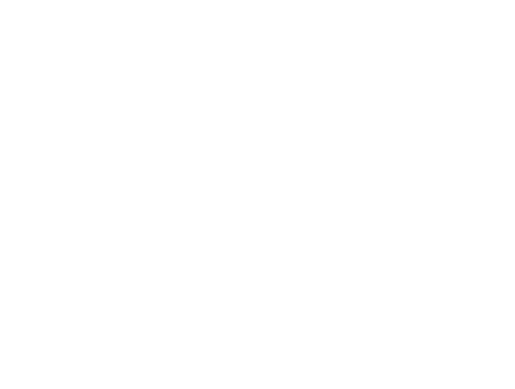

In [9]:
# @title 
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

plt.axis('off')


def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (16,5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def file2img(img_files):
    imgs=[]
    for img_file in img_files:
        image = Image.open(img_file).convert("RGB")
        image=transforms.ToTensor()(image)
        imgs.append(image)
    return imgs

good, wall, obscured, blurred, missing, left = [],[],[],[],[],[]
good_s, wall_s, obscured_s, blurred_s, missing_s, left_s = [],[],[],[],[],[]

# texts=['a house','a construction site','an image of a wall','an image of trees','an image of a vehicle','a blurred image','a plain background','a plain shade of color']

t=0
for img_file, similarity in sall:
    houseness = similarity[0]
    constructionness = similarity[1]
    wallness = similarity[2]
    treeness = similarity[3]
    vehicleness = similarity[4]
    blurrness = similarity[5]
    missingness = (similarity[6]+similarity[7])/2

    # print(img_file, similarity)
    if wallness>=0.22: # wall 0.22
    # if wallness>=0.21 and wallness<0.22: # wall
        wall.append(img_file)
        wall_s.append(similarity)
    # # elif houseness<0.21: # obscured? house
    elif houseness<0.21: # obscured? house 0.21
    # if houseness<0.22 and houseness>=0.21: # obscured? house 0.21
        obscured.append(img_file)
        obscured_s.append(similarity)
    elif blurrness>=0.22: # blur
        blurred.append(img_file)
        blurred_s.append(similarity)
    elif missingness>=0.22: # missing
        missing.append(img_file)
        missing_s.append(similarity)
    # elif constructionness-houseness>=-0.01: #-0.01
    # elif treeness-houseness>=-0.01:
    # elif vehicleness-houseness>=-0.01:
    # elif similarity[1:].sum()-7*similarity[0]>=-0.01: #0.75
    # elif constructionness-houseness>=0.01 or treeness-houseness>=0.01 or vehicleness-houseness>=0.01 or similarity[1:].sum()-7*similarity[0]>=0.01:
    elif houseness-constructionness<0.01 or houseness-treeness<0.01 or houseness-vehicleness<0.01 or 7*houseness-similarity[1:].sum()<0.18:
        left.append(img_file)
        left_s.append(7*houseness-similarity[1:].sum())
    else:
        good.append(img_file)
        good_s.append(similarity)
    # print(similarity[1:].sum()-similarity[0])
    # t+=1
    # if t >=5: break



print("sall",len(sall))
print("good",len(good))
print("wall",len(wall))
print("obscured",len(obscured))
print("blurred",len(blurred))
print("missing",len(missing))
print("left",len(left))

c=0
# imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))
# imshow(torchvision.utils.make_grid(file2img(wall),nrow=8))
# imshow(torchvision.utils.make_grid(file2img(obscured),nrow=6))
# imshow(torchvision.utils.make_grid(file2img(blurred),nrow=5))
# imshow(torchvision.utils.make_grid(file2img(missing),nrow=5))




In [ ]:
# @title display imgs
c=0

def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    # plt.figure(figsize = (20,15))
    plt.figure(figsize=(30, 14))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# display a grid of the images in each category, make sure images are collated correctly
# careful not to display too many images, else ram will explode

# imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))

imshow(torchvision.utils.make_grid(file2img(good[c:c+64])))
# imshow(torchvision.utils.make_grid(file2img(wall[c:c+64]),nrow=8))
# imshow(torchvision.utils.make_grid(file2img(obscured[c:c+64]),nrow=8))
# imshow(torchvision.utils.make_grid(file2img(obscured[c:]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(blurred[c:64]),nrow=6))
# imshow(torchvision.utils.make_grid(file2img(missing[c:]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(left[c:c+100]),nrow=10))
# imshow(torchvision.utils.make_grid(file2img(left[c:c+64])))


In [ ]:
print(obscured[c:c+64])


['/content/gsv70k/01/01. 20 BUTTERFLY AVE 2022-03.jpg', '/content/gsv70k/01/01. 9 JLN LABU AYER 2019-05.jpg', '/content/gsv70k/01/01. 7 LUCKY CRES 2022-09.jpg', '/content/gsv70k/01/01. 1A GUILLEMARD RD 2022-04.jpg', '/content/gsv70k/01/01. 102 JLN KURAS 2019-08.jpg', '/content/gsv70k/01/01. 38 PEACH GDN 2022-10.jpg', '/content/gsv70k/01/01. 30 JLN ASAS 2022-11.jpg', '/content/gsv70k/01/01. 17 ELITE TER 2022-09.jpg', '/content/gsv70k/01/01. 8 HAIG AVE 2022-05.jpg', '/content/gsv70k/01/01. 22 LIMAU GDN 2022-09.jpg', '/content/gsv70k/01/01. 92A GUILLEMARD RD 2022-09.jpg', '/content/gsv70k/01/01. 94 BRANKSOME RD 2022-03.jpg', '/content/gsv70k/01/01. 4 FIDELIO ST 2023-01.jpg', '/content/gsv70k/01/01. 132 MARSHALL RD 2022-10.jpg', '/content/gsv70k/01/01. 54 LICHI AVE 2018-03.jpg', '/content/gsv70k/01/01. 17 NAROOMA RD 2022-09.jpg', '/content/gsv70k/01/01. 22A BRIGHTON AVE 2019-04.jpg', '/content/gsv70k/01/01. 24 ROBERTS LN 2022-10.jpg', '/content/gsv70k/01/01. 442 MACPHERSON RD 2022-03.jpg',

In [ ]:
for i,x in enumerate(left_s):
    print(i, x.item())

In [56]:
# @title count imgs
# count num of imgs in each class
tt=0
for x in range(1,7):
    allfiles = os.listdir('/content/gsv70kg/0'+str(x))
    # allfiles = os.listdir('/content/gmap_clean/0'+str(x))
    # allfiles = os.listdir('/content/ggmap/0'+str(x))
    # allfiles = os.listdir('/content/ggmap_frombad/0'+str(x))
    print(x, len(allfiles))
    tt+=len(allfiles)
print("tt",tt)

1 14717
2 8540
3 19817
4 14812
5 9559
6 493
tt 67938


In [10]:
# @title delete bad files
# delete files collated in wall, obscured, blurred, missing, left
import os
c=0
for lst in [wall, obscured, blurred, missing, left]:
    for x in lst:
        # print(x)
        try: os.remove(x)
        except OSError: pass
        # c+=1
        # if c>5: break


In [14]:
# @title make new folders
import os
for x in range(1,7):
    fol = '/content/ggmap/0'+str(x)
    if not os.path.exists(fol):
        os.makedirs(fol)

In [50]:
# @title move files
import os
import shutil

# allfiles = os.listdir(source)
# for f in allfiles:
#     src_path = os.path.join(source, f)
#     dst_path = os.path.join(destination, f)
#     shutil.copyfile(src_path, dst_path)


c=0
source = '/content/gmap_clean/'
destination = '/content/gsv70k_clip/'
for x in range(1,7):
    allfiles = os.listdir(source+'0'+str(x))
    # # for src_path in good:
    for f in allfiles:
        # f=src_path.split('/')[-1]

        src_path = source+f[:2]+'/' +f
        dst_path = destination+f[:2]+'/' +f
        # print(src_path, dst_path)
        shutil.copyfile(src_path, dst_path)
        # c+=1
        # if c>5: break




In [ ]:
# @title resize imgs
# gmap: 1024,648 ; api: 640, 400
from PIL import Image
import os

c=0
for x in range(1,7):
    fol = '/content/gmap/0'+str(x)
    gfol = '/content/ggmap/0'+str(x)
    files=os.listdir(fol)
    for file in files:
        # print(file)
        im = Image.open(fol+'/'+file)
        width, height = im.size
        # print(width, height)
        im = im.resize((640, 400))
        im = im.convert('RGB')
        im.save(gfol+'/'+file)
        # print(fol+'/'+file)
        # print(gfol+'/'+file)
        # c+=1
        # if c>5: break


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -a /content/gsv70kg
# !ls

!rm -R /content/gsv70kg/.ipynb_checkpoints
!rm -R /content/gsv70kg/01/.ipynb_checkpoints
!rm -R /content/gsv70kg/02/.ipynb_checkpoints
!rm -R /content/gsv70kg/03/.ipynb_checkpoints
!rm -R /content/gsv70kg/04/.ipynb_checkpoints
!rm -R /content/gsv70kg/05/.ipynb_checkpoints
!rm -R /content/gsv70kg/06/.ipynb_checkpoints

!zip -r /content/drive/MyDrive/gsv70kg.zip /content/gsv70kg


In [ ]:
# !unzip /content/gsv.zip -d /content
!unzip /content/drive/MyDrive/gmap_clean.zip -d /
# !zip -r /content/drive/MyDrive/gmap_clean.zip /content/gmap_clean


In [45]:
import shutil
shutil.rmtree('/content/sampl/', ignore_errors=True)
